In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [77]:
df.drop(['CustomerID', 'Gender'], axis=1, inplace=True)
df.head()

Age  Annual Income (k$)  Spending Score (1-100)
0   19                  15                      39
1   21                  15                      81
2   20                  16                       6
3   23                  16                      77
4   31                  17                      40

In [78]:
df = df.rename(columns={'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})
df.head()

age  annual_income  spending_score
0   19             15              39
1   21             15              81
2   20             16               6
3   23             16              77
4   31             17              40

In [79]:
from sklearn.preprocessing import StandardScaler

df_scale = df[['age', 'annual_income', 'spending_score']]

scaler = StandardScaler()

df_scale = scaler.fit_transform(df_scale)
df_scale.shape

(200, 3)

In [80]:
df_scale[:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

In [81]:
data = pd.DataFrame(df_scale)
data.columns = ['age', 'annual_income', 'spending_score']

data_cluster = data.copy()
data.head()

age  annual_income  spending_score
0 -1.424569      -1.738999       -0.434801
1 -1.281035      -1.738999        1.195704
2 -1.352802      -1.700830       -1.715913
3 -1.137502      -1.700830        1.040418
4 -0.563369      -1.662660       -0.395980

In [82]:
data.describe()

age  annual_income  spending_score
count  2.000000e+02   2.000000e+02    2.000000e+02
mean  -9.603429e-17  -6.128431e-16   -1.121325e-16
std    1.002509e+00   1.002509e+00    1.002509e+00
min   -1.496335e+00  -1.738999e+00   -1.910021e+00
25%   -7.248436e-01  -7.275093e-01   -5.997931e-01
50%   -2.045351e-01   3.587926e-02   -7.764312e-03
75%    7.284319e-01   6.656748e-01    8.851316e-01
max    2.235532e+00   2.917671e+00    1.894492e+00

**K-Means**

Text(0, 0.5, 'Inertia')

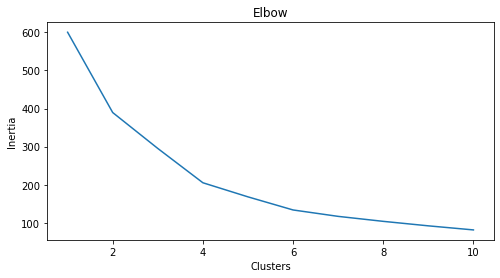

In [83]:
#menentukan jumlah k
from sklearn.cluster import KMeans

#membuat list inertia
clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data)
    clusters.append(km.inertia_)

#menampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [84]:
#membuat model
model_kmeans5 = KMeans(n_clusters=5)
model_kmeans6 = KMeans(n_clusters=6)

#train model
model_kmeans5.fit(data)
model_kmeans6.fit(data)

#menambah label pada data
data_cluster['cluster_kmeans5'] = model_kmeans5.labels_
data_cluster['cluster_kmeans6'] = model_kmeans6.labels_

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


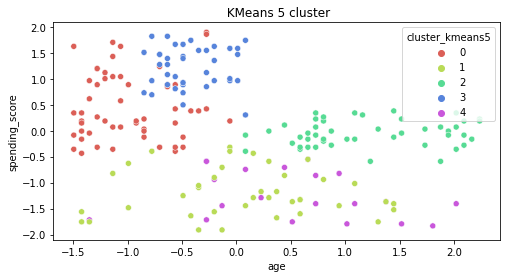

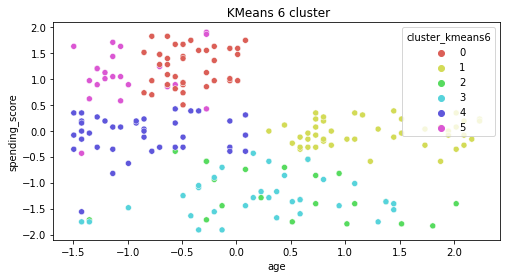

In [85]:
#menampilkan plot
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['age'], data_cluster['spending_score'], hue=data_cluster['cluster_kmeans5'], palette=sns.color_palette('hls',5))
plt.title(' KMeans 5 cluster')

plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['age'], data_cluster['spending_score'], hue=data_cluster['cluster_kmeans6'], palette=sns.color_palette('hls',6))
plt.title(' KMeans 6 cluster')
plt.show()

**K-Medoid**

In [86]:
from sklearn_extra.cluster import KMedoids

In [87]:
model_kmedoids = KMedoids(n_clusters=4, random_state=0)
model_kmedoids.fit(data)

data_cluster['Cluster K-Medoids'] = model_kmedoids.labels_
data_cluster

age  annual_income  spending_score  cluster_kmeans5  \
0   -1.424569      -1.738999       -0.434801                0   
1   -1.281035      -1.738999        1.195704                0   
2   -1.352802      -1.700830       -1.715913                4   
3   -1.137502      -1.700830        1.040418                0   
4   -0.563369      -1.662660       -0.395980                0   
..        ...            ...             ...              ...   
195 -0.276302       2.268791        1.118061                3   
196  0.441365       2.497807       -0.861839                1   
197 -0.491602       2.497807        0.923953                3   
198 -0.491602       2.917671       -1.250054                1   
199 -0.635135       2.917671        1.273347                3   

     cluster_kmeans6  Cluster K-Medoids  
0                  5                  1  
1                  5                  1  
2                  2                  2  
3                  5                  1  
4                  2                  0  
..               ...                ...  
195                0                  1  
196                3                  3  
197                0                  1  
198                3                  2  
199                0                  1  

[200 rows x 6 columns]

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


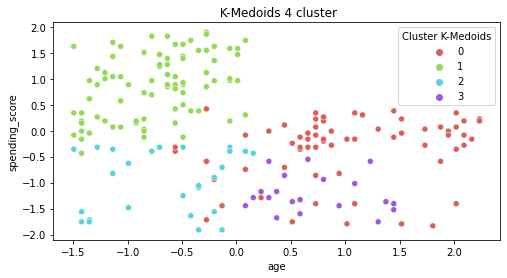

In [88]:
plt.figure(figsize=(8,4))
sns.scatterplot(data_cluster['age'], data_cluster['spending_score'], hue=data_cluster['Cluster K-Medoids'], palette=sns.color_palette('hls',4))
plt.title(' K-Medoids 4 cluster')
plt.show()

**Hierarchy**

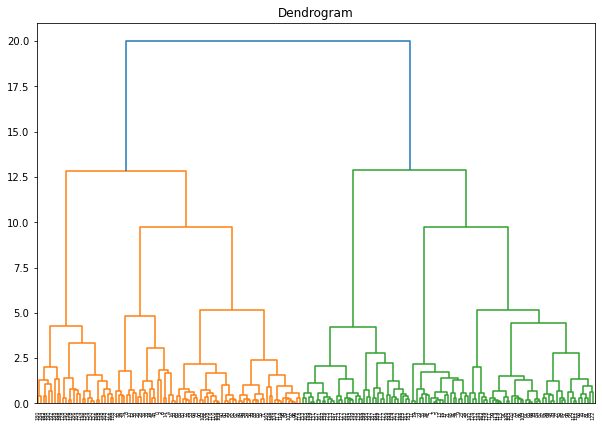

In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10,7))
plt.title("Dendrogram")
dend = dendrogram(linkage(data, method="ward"))
plt.axhline(y=35, color='r', linestyle='--')

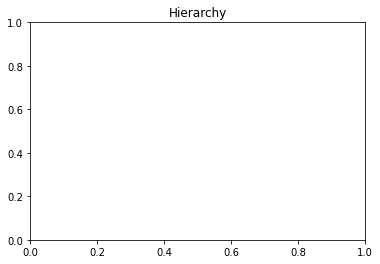

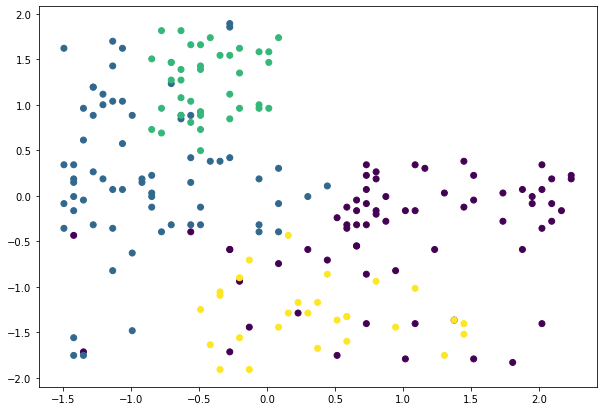

In [90]:
from sklearn.cluster import AgglomerativeClustering

model_agglo = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model_agglo.fit_predict(data)
plt.title('Hierarchy')
plt.figure(figsize=(10,7))
plt.scatter(data_cluster['age'], data_cluster['spending_score'], c=model_agglo.labels_)

**DBSCAN**

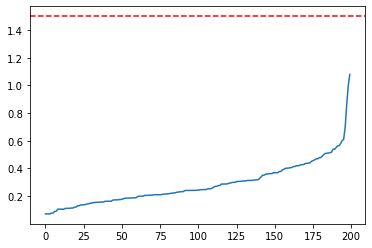

In [92]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=13)
nbrs = neigh.fit(data)
distances, indices = nbrs.kneighbors(data)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y=1.5, color='r', linestyle='--')

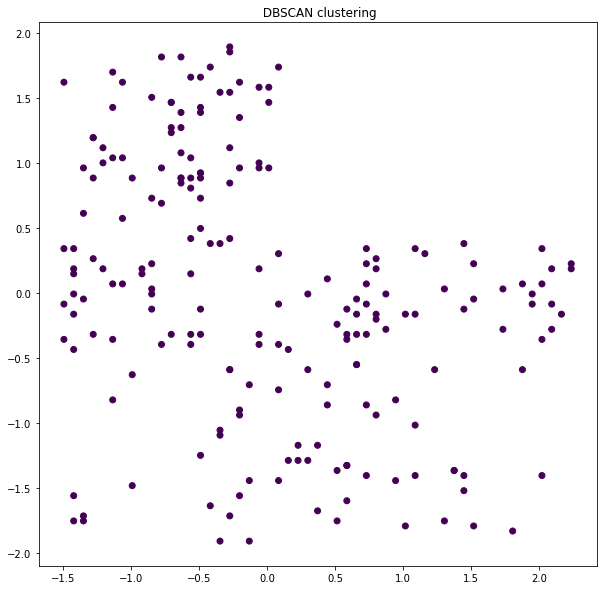

In [93]:
from sklearn.cluster import DBSCAN

model_dbscan = DBSCAN(eps=1.5, min_samples=13)
model_dbscan.fit(data)

plt.figure(figsize=(10,10))
plt.scatter(data_cluster['age'], data_cluster['spending_score'], c=model_dbscan.labels_)
plt.title(' DBSCAN clustering')
plt.show()